In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import sent_tokenize
_nltk_analyzer = None
import pandas as pd


In [33]:
nltk.download('vader_lexicon')
nltk.download('punkt')
_nltk_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ido/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ido/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
def nltk_analyze(text):
    return _nltk_analyzer.polarity_scores(text)

In [35]:
def sentences_split(text):
    sentences = sent_tokenize(text)
    return sentences

In [36]:

def calc_parts_sentiment(texts):
    #calc score on text- can be operated on corpus of texts or text splitted to sentences.
    #returns each part sentiment
    scores = []
    for text in texts:
        score = nltk_analyze(text)
        scores.append(score)
    return scores


In [37]:
#not using

def calc_total_score(score_list):
    #get sentiment_dict. calculate total score.
    total_score = {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
    for score in score_list:
        total_score["neg"] += score["neg"]
        total_score["neu"] += score["neu"]
        total_score["pos"] += score["pos"]
        total_score["compound"] += score["compound"]
    return total_score

In [38]:
#not using

def find_senteces_with_word(text_sent, word):
    #get a word and text splitted to sentences.
    #return list of sentences containing the word.
    relevant_corpus = []
    scores = []
    for sent in text_sent:
        if word in sent:
            relevant_corpus.append(sent)
            curr_score = nltk_analyze(sent)
            scores.append(curr_score)
            
    return  relevant_corpus, scores

In [39]:
def get_text_score(text_sent, word):
    #get a word and text splitted to sentences.
    #return list of sentences containing the word, each sentece score and text total score
    relevant_corpus = []
    scores = []
    total_score = {'neg_s': 0.0, 'neu_s': 0.0, 'pos_s': 0.0, 'compound_s': 0.0}
    num_of_senteces = len(text_sent)
    
    for sent in text_sent:
        if word in sent:
            relevant_corpus.append(sent)
            curr_score = nltk_analyze(sent)
            scores.append(curr_score)
                
    
            total_score["neg_s"] += curr_score["neg"]
            total_score["neu_s"] += curr_score["neu"]
            total_score["pos_s"] += curr_score["pos"]
            total_score["compound_s"] += curr_score["compound"]
    total_score["neg_s"] = total_score["neg_s"]/num_of_senteces
    total_score["neu_s"] = total_score["neu_s"]/num_of_senteces
    total_score["pos_s"] = total_score["pos_s"]/num_of_senteces
    total_score["compound_s"] = total_score["compound_s"]/num_of_senteces
    
            
    return  relevant_corpus, scores, total_score

In [40]:
def clac_score_on_corpus(corpus, name):
    text_score_df= pd.DataFrame(columns=['title', 'date', 'text_score', 'sentences_score'])
    for index, row in corpus.iterrows():
    #for row in corpus:
        text = row["text"]
        text = text.lower()
        #calc whole text score
        whole_text_score =  nltk_analyze(text)
        #sperate to senteces
        text_sent = sentences_split(text)
        #get score
        relevant_text, relevant_scores, total_score= get_text_score(text_sent,name)
        #save row to df
        df = pd.DataFrame({"index":[index],"title": [row["title"]], "date": [row['date']], "text_score":[whole_text_score], "sentences_score": [total_score]})
        text_score_df = text_score_df.append(df)
    
    return text_score_df

In [41]:
corpus = pd.read_csv('data/fox-articles-bibi.csv')
corpus.rename(columns = {'timestamp':'date'}, inplace = True)

In [42]:
corpus.head()

,text,title,source,date,url
0,close Video Sen. Chuck Schumer defends d...,Schumer plans Israel visit as Netanyahu faces ...,Fox News,2023-02-16T15:26:29Z,https://www.foxnews.com/politics/schumer-plans...
1,close Video Fox News Flash top headlines...,Israel to send earthquake aid to old foe Syria...,Fox News,2023-02-06T19:20:57Z,https://www.foxnews.com/world/israel-send-eart...
2,close Video Fox News Digital Interview w...,Israel attacks Iranian targets in Syria as sha...,Fox News,2023-02-19T19:10:05Z,https://www.foxnews.com/world/israel-attacks-i...
3,close Video Israeli Prime Minister Neta...,Israeli protesters take to streets to blast Ne...,Fox News,2023-02-13T20:23:46Z,https://www.foxnews.com/world/israeli-proteste...
4,close Video US and Israel start large sc...,Russia warns Israel against providing arms to ...,Fox News,2023-02-01T19:29:47Z,https://www.foxnews.com/world/russia-warns-isr...


In [43]:
corpus.iloc[0,1]

'Schumer plans Israel visit as Netanyahu faces protests over judicial reforms'

In [44]:
scores = clac_score_on_corpus(corpus, "netanyahu")

/var/folders/99/x78qd8fj5w30t93n516mvb3w0000gn/T/ipykernel_69061/2917354206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  text_score_df = text_score_df.append(df)
/var/folders/99/x78qd8fj5w30t93n516mvb3w0000gn/T/ipykernel_69061/2917354206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  text_score_df = text_score_df.append(df)
/var/folders/99/x78qd8fj5w30t93n516mvb3w0000gn/T/ipykernel_69061/2917354206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  text_score_df = text_score_df.append(df)
/var/folders/99/x78qd8fj5w30t93n516mvb3w0000gn/T/ipykernel_69061/2917354206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  text_

In [45]:
scores.head()
scores.iloc[0,0]

'Schumer plans Israel visit as Netanyahu faces protests over judicial reforms'

In [46]:
scores_graph = pd.concat([scores.drop(['sentences_score'], axis=1), scores['sentences_score'].apply(pd.Series)], axis=1)
scores_graph = pd.concat([scores_graph.drop(['text_score'], axis=1), scores_graph['text_score'].apply(pd.Series)], axis=1)

In [47]:
scores_graph.columns


Index(['title', 'date', 'index', 'neg_s', 'neu_s', 'pos_s', 'compound_s',
       'neg', 'neu', 'pos', 'compound'],
      dtype='object')

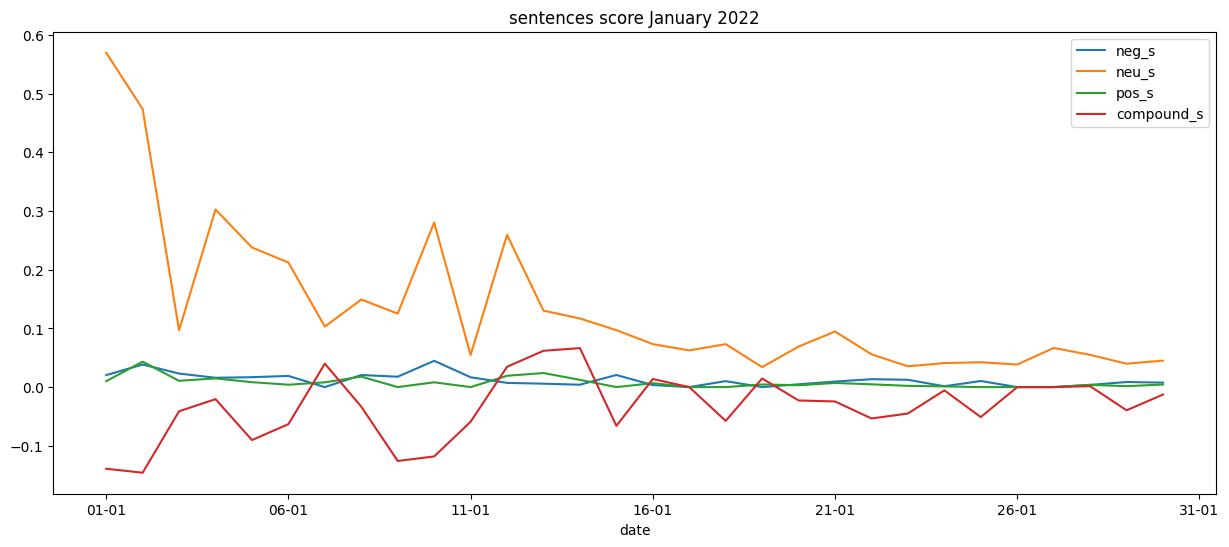

In [48]:
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
plot_1 =scores_graph.plot(x="date", y=['neg_s', 'neu_s', 'pos_s', 'compound_s'],
        kind="line", figsize=(15, 6), title='sentences score January 2022')
plot_1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))


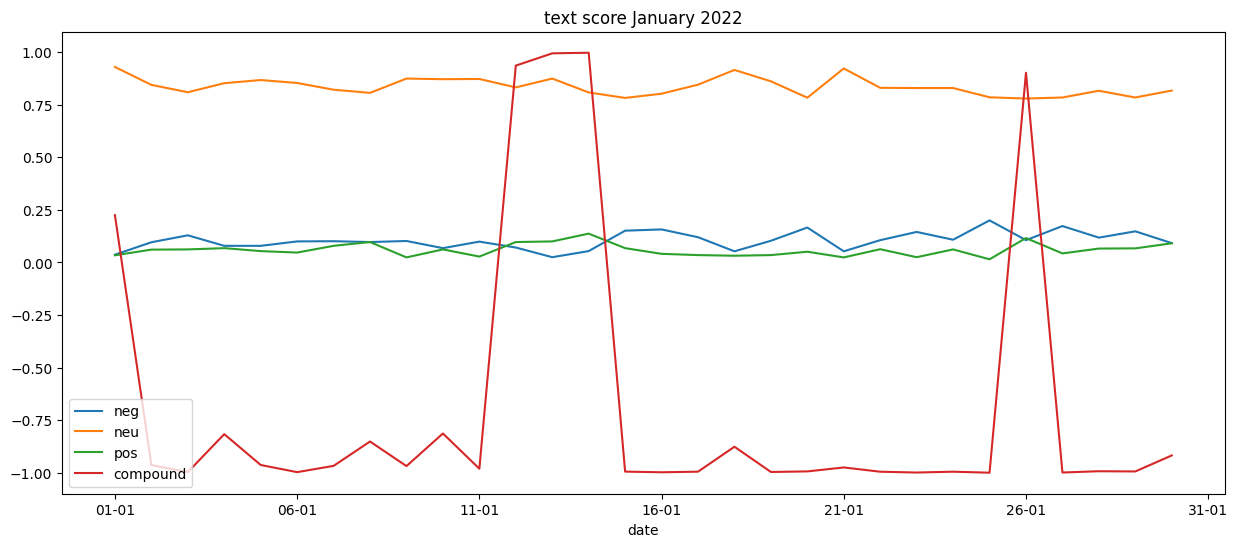

In [49]:
plot_2 = scores_graph.plot(x="date", y=['neg', 'neu', 'pos', 'compound'],
        kind="line", figsize=(15, 6), title='text score January 2022')
plot_2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

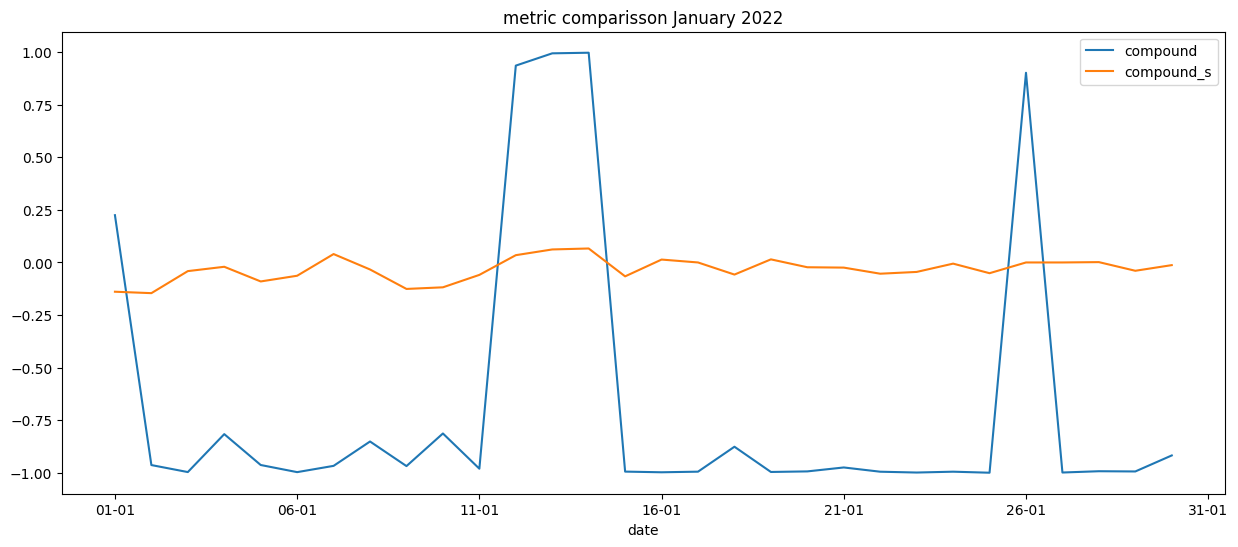

In [50]:
plot_3 = scores_graph.plot(x="date", y=['compound', 'compound_s'],
        kind="line", figsize=(15, 6), title='metric comparisson January 2022')
plot_3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

In [51]:
scores_graph.set_index('index')

,title,date,neg_s,neu_s,pos_s,compound_s,neg,neu,pos,compound
index,,,,,,,,,,
0.0,Schumer plans Israel visit as Netanyahu faces ...,2023-02-16T15:26:29Z,0.020400,0.569600,0.010000,-0.139080,0.037,0.929,0.034,0.2247
1.0,Israel to send earthquake aid to old foe Syria...,2023-02-06T19:20:57Z,0.038444,0.473778,0.043333,-0.145867,0.096,0.844,0.061,-0.9629
2.0,Israel attacks Iranian targets in Syria as sha...,2023-02-19T19:10:05Z,0.023043,0.096696,0.010696,-0.041148,0.129,0.809,0.062,-0.9962
3.0,Israeli protesters take to streets to blast Ne...,2023-02-13T20:23:46Z,0.015872,0.302615,0.014846,-0.020533,0.079,0.852,0.068,-0.8159
4.0,Russia warns Israel against providing arms to ...,2023-02-01T19:29:47Z,0.016895,0.237842,0.008368,-0.090237,0.079,0.867,0.054,-0.9626
5.0,"NYT writer says AIPAC, Jewish groups using 'po...",2023-01-25T21:19:06Z,0.019029,0.212206,0.004059,-0.063132,0.100,0.853,0.047,-0.9965
6.0,"Turkey, Syria earthquake: Biden, Netanyahu and...",2023-02-06T16:29:41Z,0.000000,0.103000,0.008111,0.039911,0.101,0.821,0.079,-0.9667
7.0,Israeli officials double down on settlement co...,2023-02-14T22:53:15Z,0.020563,0.149125,0.017813,-0.033369,0.097,0.806,0.097,-0.8509
8.0,Romania's second earthquake in two days reache...,2023-02-14T18:45:47Z,0.017714,0.125143,0.000000,-0.125814,0.102,0.874,0.024,-0.9678


In [52]:
best_article_s = scores_graph["compound_s"].argmax()
worse_article_s =scores_graph["compound_s"].argmin()

In [53]:
best_article = scores_graph["compound"].argmax()
worse_article =scores_graph["compound"].argmin()

In [54]:
best_article

13

In [55]:
worse_article

24

In [56]:
scores_graph.iloc[best_article]

title         Israel's foreign minister visits Ukraine, pled...
date                                       2023-02-16T18:45:22Z
index                                                      13.0
neg_s                                                  0.004067
neu_s                                                  0.116867
pos_s                                                  0.012333
compound_s                                             0.066407
neg                                                       0.054
neu                                                       0.808
pos                                                       0.137
compound                                                 0.9968
Name: 0, dtype: object

In [57]:
scores_graph.iloc[worse_article]

title         Palestinian rams car into crowded bus stop, ki...
date                                       2023-02-10T15:12:17Z
index                                                      24.0
neg_s                                                  0.010368
neu_s                                                  0.042263
pos_s                                                       0.0
compound_s                                            -0.051063
neg                                                         0.2
neu                                                       0.785
pos                                                       0.015
compound                                                -0.9993
Name: 0, dtype: object

In [58]:
worse_s = corpus.iloc[worse_article_s]
worse_s['title']

'Israel to send earthquake aid to old foe Syria in a rare example of cooperation between enemy neighbors'

In [59]:
best_s = corpus.iloc[best_article_s]
best_s['title']

"Israel's foreign minister visits Ukraine, pledges financial aid"

In [60]:
worse = corpus.iloc[worse_article]
worse['title']

'Palestinian rams car into crowded bus stop, killing 2 people including a 6-year-old'

In [61]:
best = corpus.iloc[best_article]
best['title']

"Israel's foreign minister visits Ukraine, pledges financial aid"

In [62]:
scores_graph.to_csv("cnn_israel_sentiment.csv", index=False)